# K-Means Clustering Implementation

This notebook implements K-Means clustering from scratch, following the GeeksforGeeks guide but adapted to use the `data.txt` file instead of sklearn's `make_blobs`.

**K-Means Clustering** is an unsupervised machine learning algorithm that groups data points into k clusters based on their similarity using Euclidean distance.


## Step 1: Importing the Necessary Libraries

We will be importing the following libraries:
- **NumPy**: for numerical operations (e.g., distance calculation)
- **Matplotlib**: for plotting data and results


In [1]:
import numpy as np
import matplotlib.pyplot as plt



## Step 2: Loading Data from data.txt

Instead of using `make_blobs` from sklearn, we will load our dataset from `data.txt`. Each line contains two space-separated floating-point values (x, y coordinates).


In [2]:
# Function to load data from data.txt file
def load_data(filename):
    """
    Load 2D data points from a text file.
    Each line should contain two space-separated floating-point values.
    """
    data = []
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            if line:  # Skip empty lines
                parts = line.split()
                if len(parts) >= 2:
                    x, y = float(parts[0]), float(parts[1])
                    data.append([x, y])
    return np.array(data)

# Load the data
X = load_data('data.txt')
print(f"Loaded {X.shape[0]} data points with {X.shape[1]} features")
print(f"Data shape: {X.shape}")
print(f"\nFirst 5 data points:")
print(X[:5])


Loaded 5000 data points with 2 features
Data shape: (5000, 2)

First 5 data points:
[[ 0.009519 -0.636513]
 [ 0.977144 -0.823159]
 [-0.001936  0.65852 ]
 [ 0.626724 -0.770501]
 [-0.694547 -0.028682]]


## Step 3: Plotting the Raw Dataset

Let's visualize our dataset to see the distribution of data points.


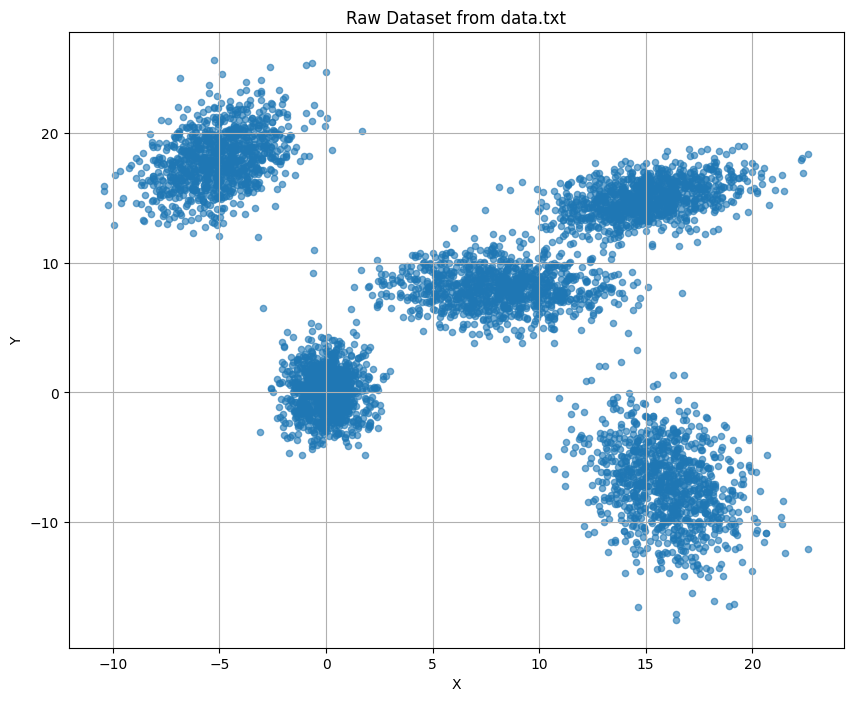

In [3]:
fig = plt.figure(figsize=(10, 8))
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=20)
plt.title('Raw Dataset from data.txt')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## Step 4: Initializing Random Centroids

We will randomly initialize k centroids for K-Means clustering. The number of clusters `k` represents how many groups we want to classify our items into.

Let's set k = 3 (you can change this value to experiment with different numbers of clusters).


In [4]:
k = 3  # Number of clusters

clusters = {}
np.random.seed(23)  # For reproducibility

# Get data range for better initialization
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

for idx in range(k):
    # Random center within data range
    center = np.array([
        np.random.uniform(x_min, x_max),
        np.random.uniform(y_min, y_max)
    ])
    points = []
    cluster = {
        'center': center,
        'points': []
    }
    clusters[idx] = cluster

# Display the initialized clusters
print("Initialized centroids:")
for i in clusters:
    center = clusters[i]['center']
    print(f"Cluster {i}: center = ({center[0]:.4f}, {center[1]:.4f})")
    
clusters


Initialized centroids:
Cluster 0: center = (6.6717, 23.3510)
Cluster 1: center = (14.8742, -5.3316)
Cluster 2: center = (-3.1202, 12.0974)


{0: {'center': array([ 6.67174987, 23.35097981]), 'points': []},
 1: {'center': array([14.87419298, -5.33164844]), 'points': []},
 2: {'center': array([-3.12022336, 12.09744771]), 'points': []}}

## Step 5: Plotting Random Initialized Centers with Data Points

Let's visualize the data points along with the initial random centroids (marked with red stars).


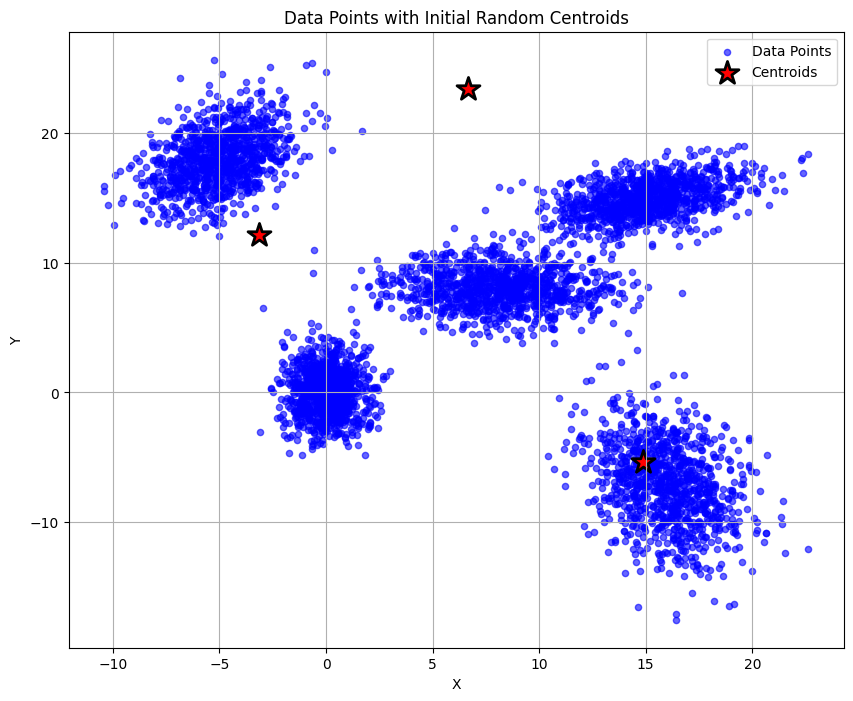

In [5]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=20, c='blue', label='Data Points')
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='*', c='red', s=300, 
               edgecolors='black', linewidths=2, label='Centroids' if i == 0 else '')
plt.title('Data Points with Initial Random Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## Step 6: Defining Euclidean Distance

To assign data points to the nearest centroid, we need to calculate the distance between points. We'll use Euclidean distance as our measurement.

**Euclidean Distance Formula**: √((x₁-x₂)² + (y₁-y₂)²)


In [6]:
def distance(p1, p2):
    """
    Calculate Euclidean distance between two points.
    p1 and p2 are numpy arrays representing points.
    """
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Test the distance function
test_p1 = np.array([0, 0])
test_p2 = np.array([3, 4])
print(f"Distance between (0,0) and (3,4): {distance(test_p1, test_p2):.2f}")
print("(Should be 5.0)")


Distance between (0,0) and (3,4): 5.00
(Should be 5.0)


## Step 7: Creating Assign and Update Functions

We need two key functions:
1. **assign_clusters**: Assigns each data point to the nearest centroid
2. **update_clusters**: Recalculates the centroids based on the average of points assigned to each cluster


In [7]:
def assign_clusters(X, clusters, k):
    """
    Assign each data point to the nearest centroid.
    """
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x, clusters[i]['center'])
            dist.append(dis)
        
        curr_cluster = np.argmin(dist)  # Find the index of the closest cluster
        clusters[curr_cluster]['points'].append(curr_x)
    
    return clusters

def update_clusters(X, clusters, k):
    """
    Recalculate centroids based on assigned points.
    """
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis=0)  # Calculate mean of points in cluster
            clusters[i]['center'] = new_center
            clusters[i]['points'] = []  # Clear points for next iteration
    return clusters

print("Functions defined successfully!")


Functions defined successfully!


## Step 8: Running the K-Means Algorithm

Now we'll run the K-Means algorithm iteratively:
1. Assign points to nearest centroids
2. Update centroids based on assigned points
3. Repeat until convergence (centroids stop changing) or maximum iterations reached


In [8]:
# Reset clusters for the algorithm
clusters = {}
np.random.seed(23)
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

for idx in range(k):
    center = np.array([
        np.random.uniform(x_min, x_max),
        np.random.uniform(y_min, y_max)
    ])
    clusters[idx] = {
        'center': center,
        'points': []
    }

# Run K-Means algorithm
max_iters = 100
tolerance = 1e-4
prev_centers = None
max_change = float('inf')  # Initialize max_change

for iteration in range(max_iters):
    # Assign points to nearest centroids
    clusters = assign_clusters(X, clusters, k)
    
    # Update centroids
    clusters = update_clusters(X, clusters, k)
    
    # Check for convergence
    if prev_centers is not None:
        max_change = 0
        for i in range(k):
            change = distance(clusters[i]['center'], prev_centers[i])
            max_change = max(max_change, change)
        
        if max_change < tolerance:
            print(f"Converged after {iteration + 1} iterations")
            break
    
    # Store current centers for next iteration
    prev_centers = [clusters[i]['center'].copy() for i in range(k)]
    
    # Print progress every 10 iterations (only if we have a valid max_change)
    if prev_centers is not None and (iteration + 1) % 10 == 0:
        print(f"Iteration {iteration + 1}: Max centroid change = {max_change:.6f}")

print(f"\nAlgorithm completed in {iteration + 1} iterations")


Converged after 9 iterations

Algorithm completed in 9 iterations


## Step 9: Predicting the Cluster for the Data Points

Create a function to predict the cluster assignment for each data point based on the final centroids.


In [9]:
def pred_cluster(X, clusters, k):
    """
    Predict cluster assignment for each data point.
    """
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i], clusters[j]['center']))
        pred.append(np.argmin(dist))  # Append index of closest cluster
    return pred

# Predict clusters for all data points
pred = pred_cluster(X, clusters, k)

# Display some predictions
print("First 10 predictions:")
print(pred[:10])
print(f"\nTotal predictions: {len(pred)}")


First 10 predictions:
[np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2)]

Total predictions: 5000


## Step 10: Plotting Data Points with Predicted Cluster Centers

Finally, let's visualize the data points colored by their predicted clusters, along with the final centroids (marked with red triangles).


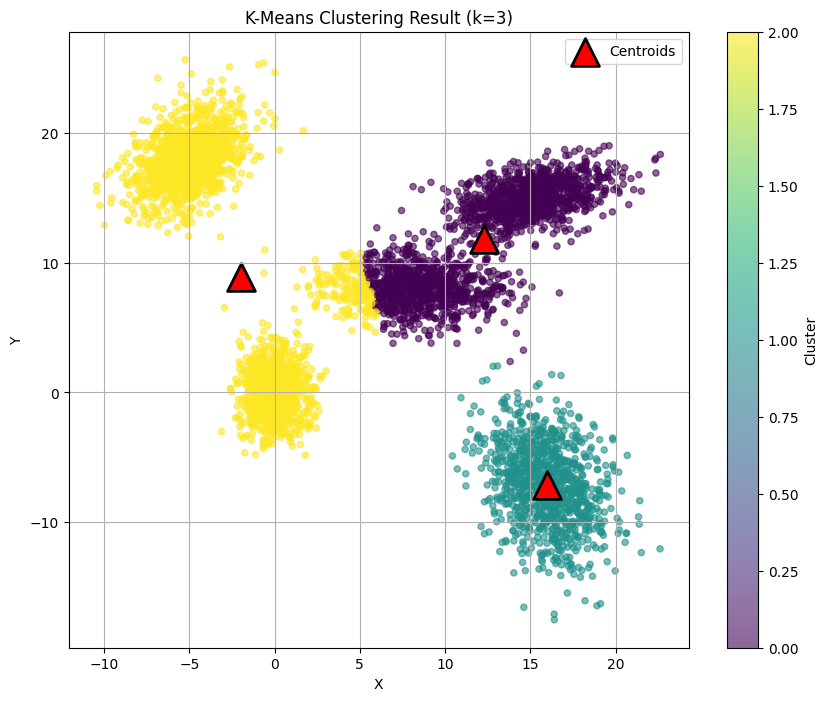

In [10]:
plt.figure(figsize=(10, 8))
plt.grid(True)

# Plot data points colored by cluster
scatter = plt.scatter(X[:, 0], X[:, 1], c=pred, cmap='viridis', 
                     alpha=0.6, s=20)

# Plot centroids
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='^', c='red', s=400,
               edgecolors='black', linewidths=2, label='Centroids' if i == 0 else '')

plt.colorbar(scatter, label='Cluster')
plt.title(f'K-Means Clustering Result (k={k})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## Results Summary

Let's display the final cluster centers and the number of points in each cluster.


In [11]:
# Print cluster centers
print("Final Cluster Centers:")
for i in range(k):
    center = clusters[i]['center']
    print(f"Cluster {i}: ({center[0]:.4f}, {center[1]:.4f})")

# Count points in each cluster
unique, counts = np.unique(pred, return_counts=True)
print("\nPoints per cluster:")
for cluster_id, count in zip(unique, counts):
    print(f"Cluster {cluster_id}: {count} points")
    
print(f"\nTotal data points: {len(pred)}")


Final Cluster Centers:
Cluster 0: (12.2559, 11.8054)
Cluster 1: (15.9506, -7.1421)
Cluster 2: (-1.9656, 8.9296)

Points per cluster:
Cluster 0: 1829 points
Cluster 1: 997 points
Cluster 2: 2174 points

Total data points: 5000


## Optional: Experimenting with Different Values of k

You can change the value of `k` in Step 4 to experiment with different numbers of clusters. Common values to try:
- k = 2, 3, 4, 5
- Use the Elbow Method to find the optimal k (not covered in this notebook)

**Note**: To run with a different k, go back to Step 4, change the value, and re-run all subsequent cells.
